In [1]:
import sys, os
from pandas.io.parsers import read_csv
import numpy as np
import pandas as pd
from collections import Counter
import scanpy as sc
import matplotlib.pyplot as plt
import glob

In [2]:
import sc_aautils as scaa
import scrublet as scr
import Colors

In [3]:
outdir = '../t1_nilsCells/'
os.system('mkdir -p '+outdir)

0

In [4]:
# Input GEX data

## input cellranger from experiment 1

indir = '/Users/cupida/Desktop/noelle_projects/CerebralOrganoids/hashtag_exp1/cellranger/cellranger_remap/'
rep1 =  sc.read_mtx(indir + 'matrix.mtx.gz').T
genes = read_csv(indir + 'features.tsv.gz', sep = '\t', index_col = 0, header = None)
barcodes = read_csv(indir + 'barcodes.tsv.gz', sep = '\t', index_col = 0, header = None)

rep1.obs.index = [idx.rsplit('-')[0] for idx in barcodes.index]

genes.columns = ['gene_name','type']
genes.index.name = 'gene_id'
rep1.var = genes

## input cellranger from experiment 2

indir = '/Users/cupida/Desktop/noelle_projects/CerebralOrganoids/hashtag_exp4/cellranger/'
rep2 =  sc.read_mtx(indir + 'matrix.mtx.gz').T
genes = read_csv(indir + 'features.tsv.gz', sep = '\t', index_col = 0, header = None)
barcodes = read_csv(indir + 'barcodes.tsv.gz', sep = '\t', index_col = 0, header = None)

rep2.obs.index = [idx.rsplit('-')[0] for idx in barcodes.index]

genes.columns = ['gene_name','type']
genes.index.name = 'gene_id'
rep2.var = genes

rep1, rep2

(AnnData object with n_obs × n_vars = 6370 × 36614
     var: 'gene_name', 'type',
 AnnData object with n_obs × n_vars = 4661 × 36608
     var: 'gene_name', 'type')

In [5]:
rep1.obs.index = [idx + '_rep1' for idx in rep1.obs.index]
rep2.obs.index = [idx + '_rep2' for idx in rep2.obs.index]

In [6]:
cnt = Counter(rep1.var['gene_name'])
rep1.var['gene_id'] = rep1.var.index
rep1.var.index = [rep1.var.loc[idx,'gene_name'] if cnt[rep1.var.loc[idx,'gene_name']]==1 else idx for idx in rep1.var.index]


In [7]:
cnt = Counter(rep1.var['gene_name'])
rep2.var['gene_id'] = rep2.var.index
rep2.var.index = [rep2.var.loc[idx,'gene_name'] if cnt[rep2.var.loc[idx,'gene_name']]==1 else idx for idx in rep2.var.index]


In [8]:
rep1 = rep1[:,rep1.var['type'] == 'Gene Expression']
rep2 = rep2[:,rep2.var['type'] == 'Gene Expression']

In [9]:
def concatSCobj(sc1, sc2, names = ['1','2']):
#    sc1.obs.index = [idx + '_' + names[0] for idx in sc1.obs.index]
#    sc2.obs.index = [idx + '_' + names[1] for idx in sc2.obs.index]
    msc = sc1.concatenate(sc2, join = 'outer', batch_categories = names, index_unique = None)
    msc.X = np.nan_to_num(msc.X, nan = 0.0, posinf = 0, neginf = 0)
    return msc

In [10]:
adata = concatSCobj(rep1, rep2)

/Users/cupida/anaconda3_2023/lib/python3.11/site-packages/anndata/_core/anndata.py:1823: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(


In [11]:
adata.shape, rep1.shape, rep2.shape

((11031, 36606), (6370, 36606), (4661, 36606))

# upload Nils umap

In [12]:
udf = read_csv('nils_umap_complete.tsv', sep = '\t', index_col = 0)

In [13]:
udf.head()

,u1,u2,orig.ident,nCount_RNA,nFeature_RNA,sample,percent.mito,percent.ribo,source,gender.score,...,cluster_annotation,Nils_idx,tracker_barcode,nils_sampleID,experiment,celltype,replicate,WT,lin_barcode,NMF
AAACCCATCTTTGCTA_rep2,-5.170157,4.050596,SeuratProject,11123,3397,sc2_H9_1,1.024903,7.747257,cell,0.0,...,MES-like,T1-2-H9-1_AAACCCATCTTTGCTA-1,AGCGTGACTTCCGGGG,T1-2-H9-1,sc,H9,2,False,sc2_H9_1-AGCGTGACTTCCGGGG,5
AAAGAACCAACAACAA_rep2,4.444913,1.239219,SeuratProject,7699,3054,sc2_H9_1,0.948175,6.432064,cell,0.0,...,OPC-like,T1-2-H9-1_AAAGAACCAACAACAA-1,AGCGTGACTTCCGGGG,T1-2-H9-1,sc,H9,2,False,sc2_H9_1-AGCGTGACTTCCGGGG,2
AAAGGATAGTAAGACT_rep2,-4.511832,2.208798,SeuratProject,12404,3602,sc2_H9_1,2.305708,8.495935,cell,0.0,...,MES-like,T1-2-H9-1_AAAGGATAGTAAGACT-1,AGCGTGACTTCCGGGG,T1-2-H9-1,sc,H9,2,False,sc2_H9_1-AGCGTGACTTCCGGGG,3
AAAGGGCTCGGTGAAG_rep2,-4.126611,3.951484,SeuratProject,17151,4186,sc2_H9_1,1.819136,8.576808,cell,0.0,...,MES-like,T1-2-H9-1_AAAGGGCTCGGTGAAG-1,AGCGTGACTTCCGGGG-TTGTTGCGGTGAGAGC,T1-2-H9-1,sc,H9,2,False,sc2_H9_1-AGCGTGACTTCCGGGG-TTGTTGCGGTGAGAGC,3
AAAGGTAGTTAACCTG_rep2,-4.962984,3.083859,SeuratProject,14227,3869,sc2_H9_1,2.741267,8.626434,cell,0.0,...,MES-like,T1-2-H9-1_AAAGGTAGTTAACCTG-1,AGCGTGACTTCCGGGG,T1-2-H9-1,sc,H9,2,False,sc2_H9_1-AGCGTGACTTCCGGGG,5


In [14]:
adata = adata[[idx in udf.index for idx in adata.obs.index],:]

In [15]:
adata.shape, udf.shape

((4707, 36606), (4707, 24))

# Scanpy Analysis 

In [16]:
adata.obs['n_counts'] = np.array(adata.X.sum(axis=1).reshape(len(adata.obs)))[0]
adata.obs['n_genes'] = np.array((adata.X>0).sum(axis=1).reshape(len(adata.obs)))[0]

/var/folders/ht/4c6cf6y13c356khd1r0vtqxh0000gn/T/ipykernel_64155/1961927223.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_counts'] = np.array(adata.X.sum(axis=1).reshape(len(adata.obs)))[0]


In [17]:
adata.var['n_counts'] = np.array(adata.X.sum(axis=0))[0]
adata.var['n_cells'] = np.array((adata.X>0).sum(axis=0))[0]

In [18]:
sc.pp.normalize_total(adata, target_sum = 1e4)
sc.pp.log1p(adata)
adata.raw = adata


In [19]:
sc.pp.highly_variable_genes(adata, min_mean=0.05, max_mean=3, min_disp=0.5)

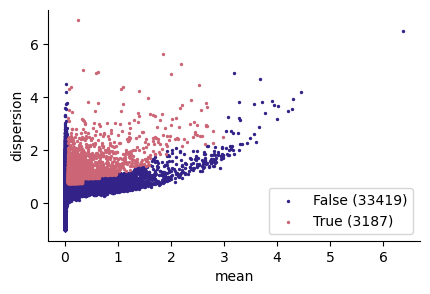

In [20]:
fig, ax = plt.subplots(ncols = 1, figsize = (3*1.6, 3))
for hv in set(adata.var['highly_variable']):
    aux = adata.var[adata.var['highly_variable']==hv]
    ax.scatter(aux['means'], aux['dispersions'], s = 2, label = str(hv) + ' ('+str(len(aux)) + ')')
ax.set_xlabel('mean'); ax.set_ylabel('dispersion'); ax.legend();


In [21]:
cell_cycle_genes = [x.strip().capitalize() for x in open('../regev_lab_cell_cycle_genes.txt')]
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]

In [22]:
adata.var['cell_cycle_gene'] = [adata.var.loc[idx,'gene_name'] in [g.upper() for g in cell_cycle_genes] for idx in adata.var.index]


In [23]:
adata = adata[:,(adata.var.highly_variable)&(~adata.var.cell_cycle_gene)]

In [24]:
adata.obs

,batch,n_counts,n_genes
AAACCCACATCCTGTC_rep1,1,2378.0,1124
AAACCCATCACGGTCG_rep1,1,5040.0,1789
AAACGAAGTCCATAGT_rep1,1,3289.0,1545
AAACGAATCTGTAAGC_rep1,1,6806.0,3102
AAACGCTAGCCGTAAG_rep1,1,7317.0,3144
...,...,...,...
TTTCCTCGTATCCCAA_rep2,2,1397.0,790
TTTCGATGTCAACACT_rep2,2,8693.0,3190
TTTGGAGGTCATACCA_rep2,2,2423.0,1367
TTTGTTGAGCTCTGTA_rep2,2,746.0,538


In [25]:
sc.pp.regress_out(adata, ['n_counts'])


/Users/cupida/anaconda3_2023/lib/python3.11/site-packages/anndata/_core/anndata.py:1294: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c


In [26]:
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack', n_comps = min([min(adata.shape)-1,1000]))


/Users/cupida/anaconda3_2023/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


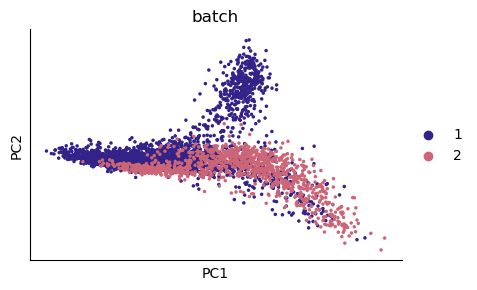

In [27]:
sc.pl.pca(adata, color = 'batch')

In [28]:
sc.pp.neighbors(adata, n_neighbors = 10, n_pcs = 15,  metric = 'manhattan')
sc.tl.umap(adata, n_components = 2, random_state = 235123,  min_dist = 0.1, spread = 0.75, maxiter = 500)
sc.tl.leiden(adata)

2024-01-26 14:50:57.359853: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


/Users/cupida/anaconda3_2023/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


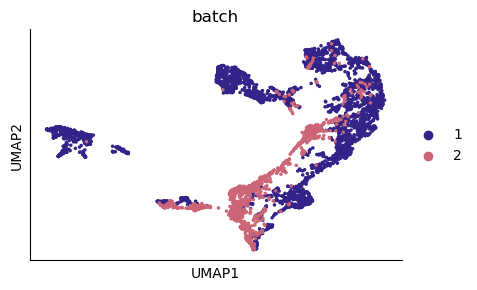

In [29]:
sc.pl.umap(adata, color = 'batch')

# append Nils' metadata

In [30]:
udf = udf.loc[adata.obs.index]

In [31]:
udf.head()

,u1,u2,orig.ident,nCount_RNA,nFeature_RNA,sample,percent.mito,percent.ribo,source,gender.score,...,cluster_annotation,Nils_idx,tracker_barcode,nils_sampleID,experiment,celltype,replicate,WT,lin_barcode,NMF
AAACCCACATCCTGTC_rep1,3.306650,-3.791190,SeuratProject,2378,1124,sc1_H9_2,6.518082,4.771829,cell,0.0,...,tIPC,A0257_AAACCCACATCCTGTC-1,-,A0257,sc,H9,1,False,-,1
AAACCCATCACGGTCG_rep1,-5.861562,5.959730,SeuratProject,5040,1789,sc1_H9_2,8.095238,3.612771,cell,0.0,...,AC-like,A0257_AAACCCATCACGGTCG-1,-,A0257,sc,H9,1,False,-,8
AAACGAAGTCCATAGT_rep1,3.879187,-2.712126,SeuratProject,3289,1545,sc1_H9_2,18.911523,4.319959,cell,0.0,...,tIPC,A0257_AAACGAAGTCCATAGT-1,-,A0257,sc,H9,1,False,-,1
AAACGAATCTGTAAGC_rep1,0.412969,-5.970095,SeuratProject,6806,3102,sc1_H9_1,2.159859,5.775732,cell,0.0,...,tIPC,A0256_AAACGAATCTGTAAGC-1,-,A0256,sc,H9,1,False,-,4
AAACGCTAGCCGTAAG_rep1,6.775797,-4.486187,SeuratProject,7317,3144,sc1_IPS_4,2.186689,6.340884,cell,0.0,...,tIPC,A0264_AAACGCTAGCCGTAAG-1,-,A0264,sc,IPS,1,False,-,1


In [32]:
adata.obsm['X_umap_def'] = adata.obsm['X_umap']
adata.obsm['X_umap_nils'] = np.array(udf[['u1','u2']])
adata.obsm['X_umap'] = adata.obsm['X_umap_nils']

/Users/cupida/anaconda3_2023/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


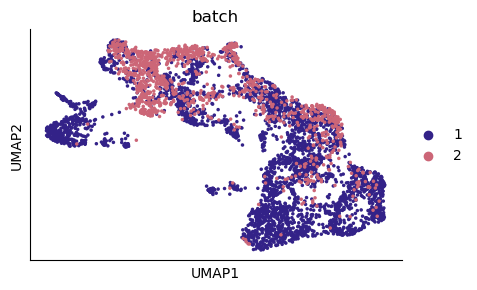

In [33]:
sc.pl.umap(adata, color = 'batch')

In [34]:
udf.columns

Index(['u1', 'u2', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample',
       'percent.mito', 'percent.ribo', 'source', 'gender.score',
       'RNA_snn_res.0.8', 'names', 'tumor.plasmids.malignancy.25',
       'predicted.id.Liu', 'cluster_annotation', 'Nils_idx', 'tracker_barcode',
       'nils_sampleID', 'experiment', 'celltype', 'replicate', 'WT',
       'lin_barcode', 'NMF'],
      dtype='object')

In [35]:
for col in ['sample','celltype','lin_barcode','NMF']:
    adata.obs[col] = udf[col]

In [36]:
adata.obs['NMF'] = adata.obs['NMF'].astype('category')

/Users/cupida/anaconda3_2023/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/cupida/anaconda3_2023/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/cupida/anaconda3_2023/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


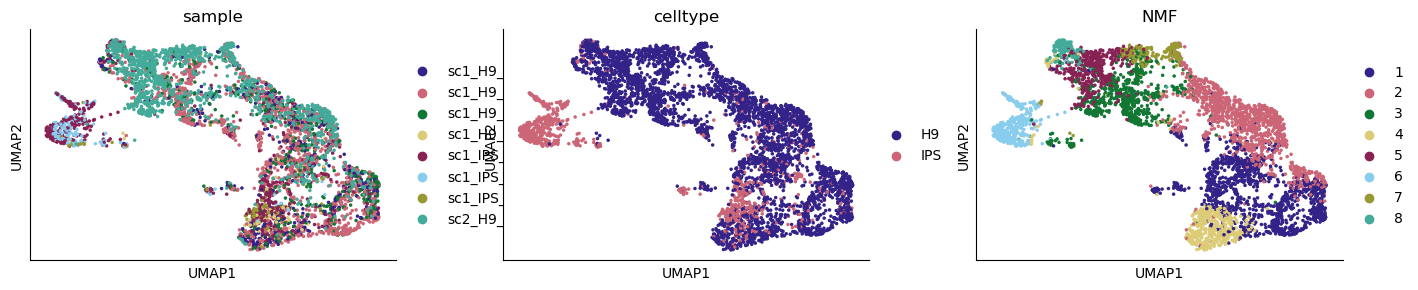

In [37]:
sc.pl.umap(adata, color = ['sample','celltype','NMF'])

# Clone size information

In [38]:
ls

Nils_adata_adaptation.ipynb          snRNA_GEXdata.ipynb
adata_nilscells.h5ad                 snRNA_GEXdata_withGeneRemoval.ipynb
barcode_enrichment_cNMF.pdf          t1_GEXdata.ipynb
clone_cellfraction.csv               t1_GEXdata_nilsCells.ipynb
clone_metadata.csv                   t1_barcodes.ipynb
final_umap.tsv                       t1_sn_nils_GEXdata.ipynb
lineage_barcodes_rawanalysis.ipynb   t1_untreated/
lineage_tracing_in_t1-v2.ipynb       t1t2_untreated_GEXdata.ipynb
lineage_tracing_in_t1.ipynb          t2_GEXdata.ipynb
lineage_tracing_in_t1_cNMF.ipynb     umap.tsv
lineagebarcode2color.csv             upregulated_bigClones.csv
nils_umap_complete.tsv               upregulated_smallClones.csv
nmf_assignment.csv                   upset_mindegree2_231111.pdf
sample2color.csv


In [54]:
clonesize = read_csv('clone_metadata.csv', index_col = 0)
clonesize['sample'] = [idx.rsplit('-')[0] for idx in clonesize.index]
clonesize

,size,fraction,sample
sc1_H9_1-AAGGGCGGGATCAATT-CGGTCCGGTAAACACG,1,0.007407,sc1_H9_1
sc1_H9_1-CAGAAACGCTAAAACG,1,0.007407,sc1_H9_1
sc1_H9_1-CGCGGGGAGCTGAGGG,1,0.007407,sc1_H9_1
sc1_H9_1-CGGCTCACGTTTTAGG,1,0.007407,sc1_H9_1
sc1_H9_1-CGGTCCGGTAAACACG,36,0.266667,sc1_H9_1
...,...,...,...
sc2_H9_1-AGCGTGACTTCCGGGG-TTAAGTGTGCGCTGGA-TTGTTGCGGTGAGAGC,1,0.001012,sc2_H9_1
sc2_H9_1-AGCGTGACTTCCGGGG-TTGTTGCGGTGAGAGC,180,0.182186,sc2_H9_1
sc2_H9_1-GGGGTGGCTTATTGAA-TTAAGTGTGCGCTGGA,1,0.001012,sc2_H9_1
sc2_H9_1-GGGGTGGCTTATTGAA-TTAAGTGTGCGCTGGA-TTGTTGCGGTGAGAGC,1,0.001012,sc2_H9_1


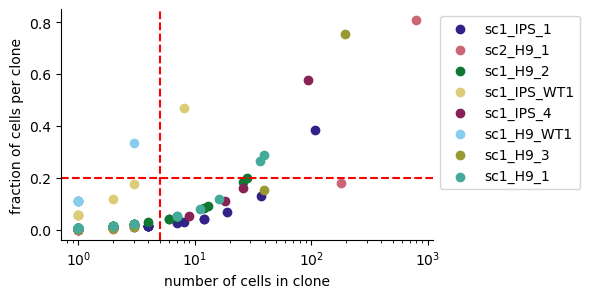

In [162]:
fig, ax = plt.subplots()
for s in set(clonesize['sample']):
    sdf = clonesize[clonesize['sample']==s]
    ax.scatter(sdf['size'], sdf['fraction'], label = s)
ax.set_xscale('log')
ax.set_xlabel('number of cells in clone'); ax.set_ylabel('fraction of cells per clone')
ax.legend(loc = 2, bbox_to_anchor = (1,1))
ax.axhline(0.2, c = 'r', ls = '--')
ax.axvline(5, c = 'r', ls = '--')
plt.show()

In [163]:
def assign_clone_type(clone, clonesize = clonesize, frac_threshold = 0.2, cell_threshold = 5):
    if clone in clonesize.index and 'WT' not in clone:
        t = 'big' if clonesize.loc[clone,'fraction']>frac_threshold and clonesize.loc[clone,'size']>cell_threshold else 'small'
    else: 
        t = '-'
    return t

In [164]:
adata.obs['clonetype'] = adata.obs['lin_barcode'].apply(lambda x: assign_clone_type(x))

In [165]:
Counter(adata.obs['clonetype'])

Counter({'-': 2744, 'big': 1270, 'small': 693})

In [166]:
adata.write('adata_nilscells.h5ad')

In [167]:
fadata = adata[adata.obs['lin_barcode']!= '-',:]

In [168]:
dex = scaa.difGeneExpr(fadata, ['clonetype'], n_genes=36606)['clonetype']

/Users/cupida/.local/lib/python3.11/site-packages/sc_aautils.py:150: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[cluster] = adata.obs[cluster].astype('category')


*clonetype*


In [169]:
gexdf = pd.DataFrame(fadata.raw.X.toarray(), columns = fadata.raw.var.index, index = fadata.obs.index)

In [170]:
dex['big']['cell_number'] = dex['big'].apply(lambda x: (gexdf[x.name]>0).sum(), axis = 1)

In [171]:
dex['small']['cell_number'] = dex['small'].apply(lambda x: (gexdf[x.name]>0).sum(), axis = 1)

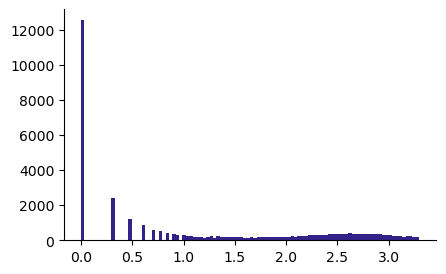

In [173]:
fig, ax = plt.subplots()
ax.hist(np.log10(dex['big']['cell_number']+1), bins = 100)
plt.show()

In [ ]:
10**1.5

In [174]:
dex['big'] = dex['big'][dex['big']['cell_number']>30]

In [175]:
dex['big'].sort_values(by='logfoldchanges', ascending=False)

,logfoldchanges,pvals,pvals_adj,scores,cell_number
names,,,,,
HIST1H3G,2.812738,3.261273e-08,1.922418e-06,5.552248,63
ABCC3,2.541898,1.681996e-05,4.520641e-04,4.316273,47
ACOX2,2.475671,1.273538e-08,8.415005e-07,5.716723,79
KCNIP3,2.446323,3.220967e-04,5.633644e-03,3.603613,33
IL4R,2.403369,4.294144e-04,7.164604e-03,3.527543,31
...,...,...,...,...,...
SHISA9,-2.638387,4.070315e-05,9.594202e-04,-4.126304,40
AC011632.1,-2.745258,7.803596e-07,3.177513e-05,-4.976110,49
AC006115.2,-2.821380,5.775102e-06,1.788523e-04,-4.564468,45


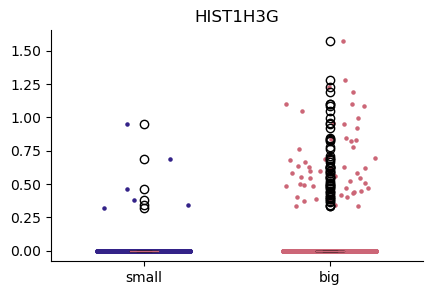

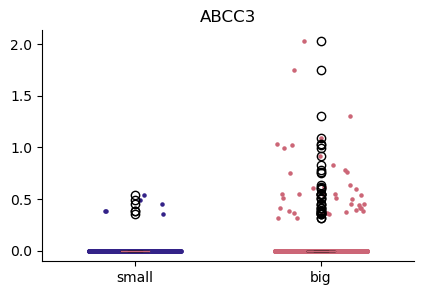

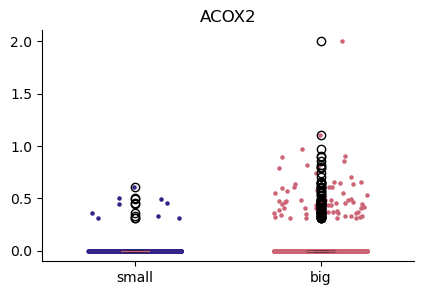

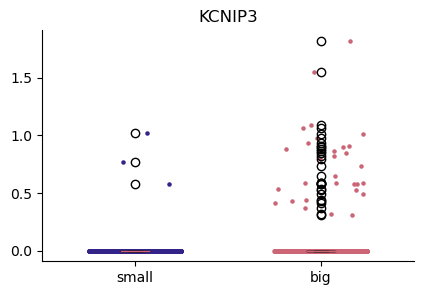

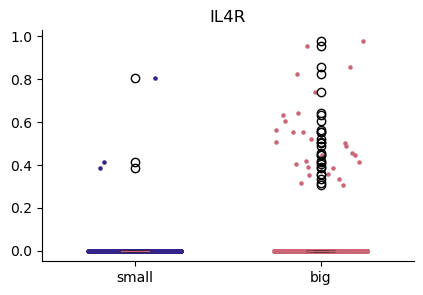

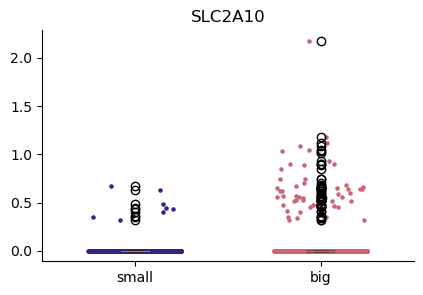

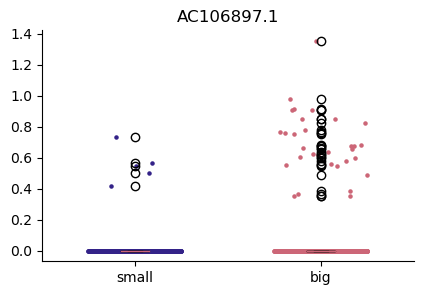

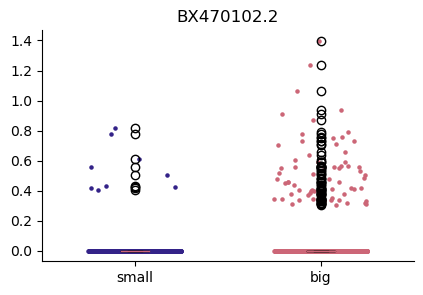

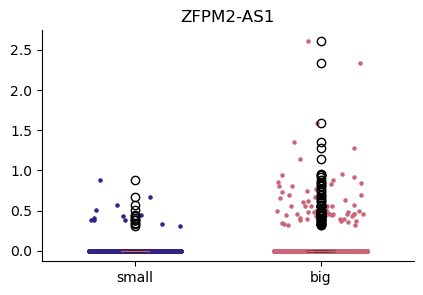

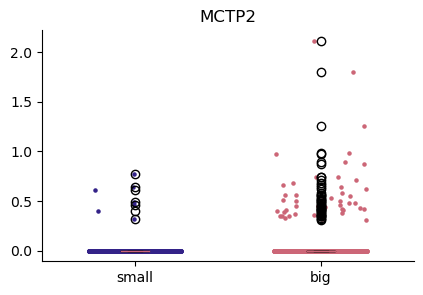

In [176]:
for g in dex['big'].sort_values(by='logfoldchanges', ascending=False).index[:10]:
    fig, ax = plt.subplots()
    cells = adata.obs[adata.obs['clonetype']=='small'].index
    ax.scatter(0.5*(np.random.rand(len(cells)))+0.75, gexdf.loc[cells,g], s = 5)
    cells = adata.obs[adata.obs['clonetype']=='big'].index
    ax.scatter(0.5*np.random.rand(len(cells))+1.75, gexdf.loc[cells,g], s = 5)
    ax.set_title(g)
    ax.boxplot([gexdf.loc[adata.obs[adata.obs['clonetype']=='small'].index][g], gexdf.loc[adata.obs[adata.obs['clonetype']=='big'].index][g]])
    ax.set_xticklabels(['small','big'])
    plt.show()     

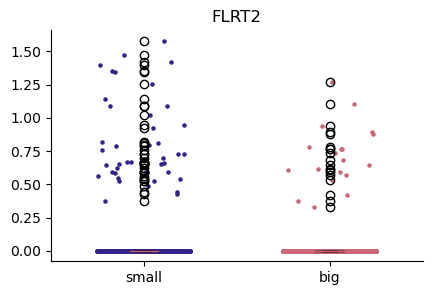

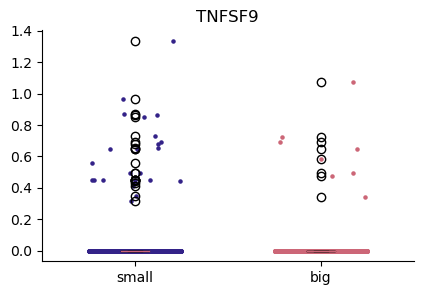

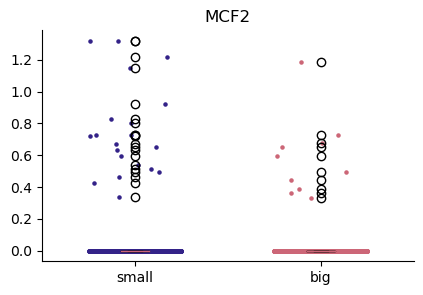

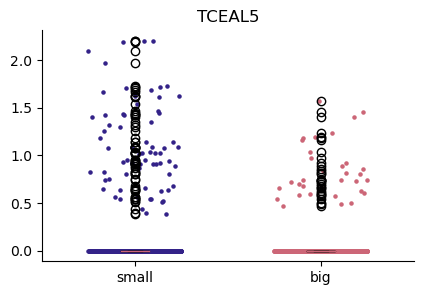

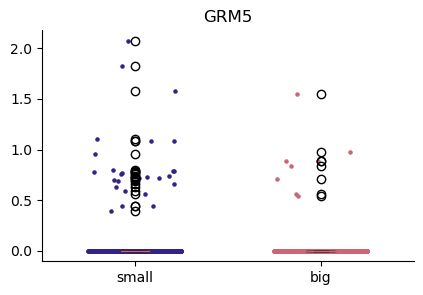

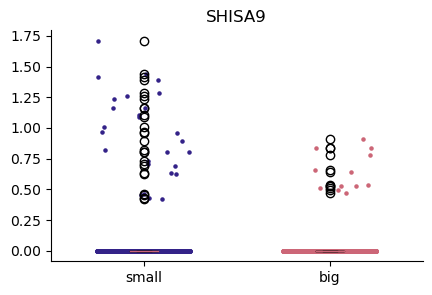

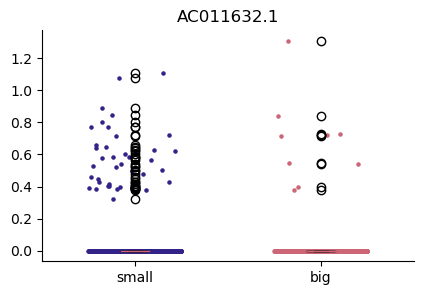

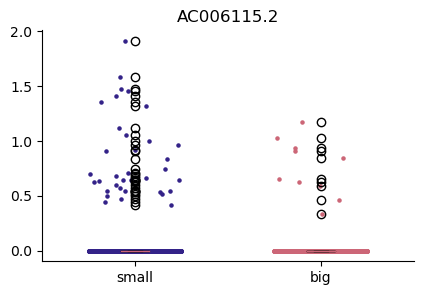

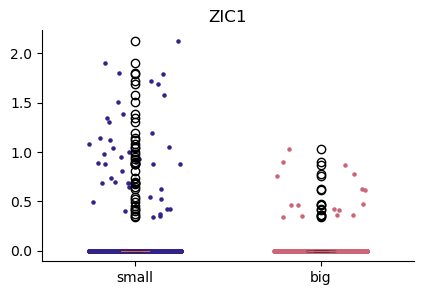

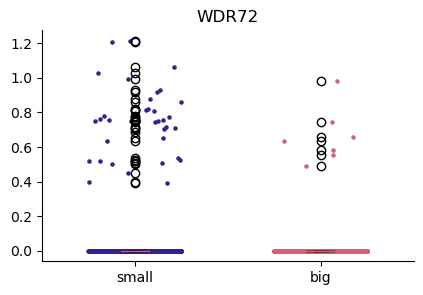

In [177]:
for g in dex['big'].sort_values(by='logfoldchanges', ascending=False).index[-10:]:
    fig, ax = plt.subplots()
    cells = adata.obs[adata.obs['clonetype']=='small'].index
    ax.scatter(0.5*(np.random.rand(len(cells)))+0.75, gexdf.loc[cells,g], s = 5)
    cells = adata.obs[adata.obs['clonetype']=='big'].index
    ax.scatter(0.5*np.random.rand(len(cells))+1.75, gexdf.loc[cells,g], s = 5)
    ax.set_title(g)
    ax.boxplot([gexdf.loc[adata.obs[adata.obs['clonetype']=='small'].index][g], gexdf.loc[adata.obs[adata.obs['clonetype']=='big'].index][g]])
    ax.set_xticklabels(['small','big'])
    plt.show()     

Text(0, 0.5, '-log10(adj P value)')

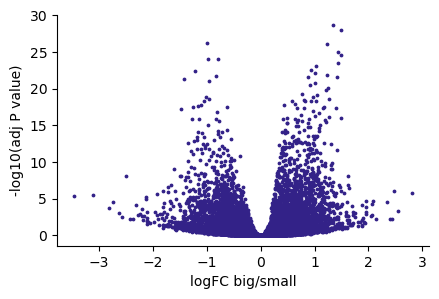

In [179]:
fig, ax = plt.subplots()
ax.scatter(dex['big']['logfoldchanges'], -np.log10(dex['big']['pvals_adj']), s = 3)
ax.set_xlabel('logFC big/small')
ax.set_ylabel('-log10(adj P value)')
#ax.set_xlim(-8,8)


In [180]:
dex['big'][(dex['big']['logfoldchanges']>1)&(dex['big']['pvals_adj']<1e-3)].head(30)

,logfoldchanges,pvals,pvals_adj,scores,cell_number
names,,,,,
LDHA,1.339418,6.440515e-34,2.357615e-29,12.420808,1432
A2M,1.489955,5.850925e-33,1.070895e-28,12.205907,915
TSPO,1.224251,1.087289e-30,9.950330e-27,11.738451,935
VIM,1.433250,1.245358e-29,9.117512e-26,11.545553,1820
HOPX,1.492379,4.837302e-29,2.951238e-25,11.386993,1000
RGS20,1.431443,8.161484e-28,3.319548e-24,11.103795,643
MDK,1.023185,2.127505e-27,7.787945e-24,11.065858,1616
C1orf61,1.012870,2.333259e-26,6.570099e-23,10.846711,1712
PSMB9,1.240833,5.153111e-26,1.347391e-22,10.726894,983


In [189]:
sdex = dex['big'][(dex['big']['logfoldchanges']>1)&(dex['big']['pvals_adj']<1e-3)].sort_values(by='scores', ascending=False)

In [184]:
noelle = read_csv('noelle_metascale_bigvssmall_1.txt', sep = '\t')

In [188]:
noelle_big = [g for g in noelle['big_up_1'] if type(g)==str]

In [195]:
len(noelle_big)

149

In [194]:
dex['big'].loc[[idx for idx in noelle_big if idx in dex['big'].index]]

,logfoldchanges,pvals,pvals_adj,scores,cell_number
names,,,,,
WFDC1,1.515064,5.008068e-03,5.395095e-02,2.809654,43
HIST1H3G,2.812738,3.261273e-08,1.922418e-06,5.552248,63
ABCC3,2.541898,1.681996e-05,4.520641e-04,4.316273,47
ACOX2,2.475671,1.273538e-08,8.415005e-07,5.716723,79
SLC2A10,2.340705,6.760167e-07,2.812076e-05,4.986501,64
...,...,...,...,...,...
ANXA1,1.068992,2.427527e-10,2.517339e-08,6.367646,470
RUNX1,1.060143,4.059019e-10,4.048623e-08,6.284770,394
DPPA4,1.060208,2.739463e-12,4.398279e-10,7.037569,482


In [197]:
tmpdex

,logfoldchanges,pvals,pvals_adj,scores,cell_number
names,,,,,
WFDC1,1.515064,5.008068e-03,5.395095e-02,2.809654,43
HIST1H3G,2.812738,3.261273e-08,1.922418e-06,5.552248,63
ABCC3,2.541898,1.681996e-05,4.520641e-04,4.316273,47
ACOX2,2.475671,1.273538e-08,8.415005e-07,5.716723,79
SLC2A10,2.340705,6.760167e-07,2.812076e-05,4.986501,64
...,...,...,...,...,...
ANXA1,1.068992,2.427527e-10,2.517339e-08,6.367646,470
RUNX1,1.060143,4.059019e-10,4.048623e-08,6.284770,394
DPPA4,1.060208,2.739463e-12,4.398279e-10,7.037569,482


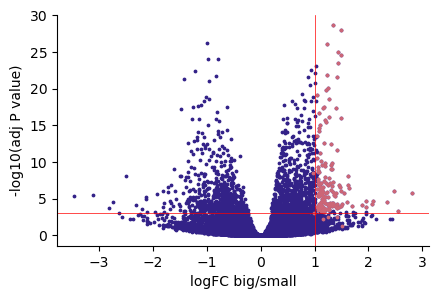

In [202]:
fig, ax = plt.subplots()
ax.scatter(dex['big']['logfoldchanges'], -np.log10(dex['big']['pvals_adj']), s = 3)
tmpdex = dex['big'].loc[[idx for idx in noelle_big if idx in dex['big'].index]]
ax.scatter(tmpdex['logfoldchanges'], -np.log10(tmpdex['pvals_adj']), s = 3)
ax.set_xlabel('logFC big/small')
ax.set_ylabel('-log10(adj P value)')
#ax.set_xlim(-8,8)

ax.axvline(1, lw = 0.5, c = 'r')
ax.axhline(3, lw = 0.5, c = 'r')
